# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)
print(X)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  



In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [6]:
print(np.shape(X_train))
print(np.shape(X_test))

(60000, 784)
(10000, 784)


### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

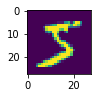

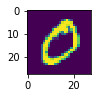

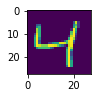

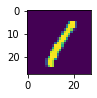

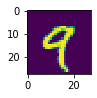

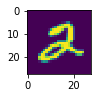

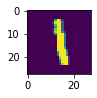

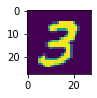

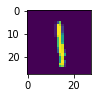

In [7]:
from matplotlib import pyplot
for i in range(9):  
    digit = X[i]
    digit_pixels = digit.reshape(28, 28)
    plt.subplot(330 + 1 + i)
    plt.imshow(digit_pixels)
    plt.show()


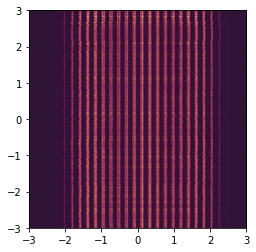

In [8]:
import matplotlib.cm as cm
fig_2, ax_2 = plt.subplots()
im = plt.imshow(X, interpolation='bilinear', cmap=cm.twilight,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(X).max(), vmin=-abs(X).max())


### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [9]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
scoreGauss = gauss.fit(X_train, y_train)
GaussianNB()

#print(X_test)
predGauss = gauss.predict(X_test)
print(predGauss)



['8' '9' '9' ... '3' '0' '8']


In [10]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
sgd = make_pipeline(StandardScaler(),
                    SGDClassifier(tol=1e-3))
scoreSGD = sgd.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()),
                #('sgdclassifier', SGDClassifier())])
predSGD = sgd.predict(X_test)
print(predSGD)


['8' '4' '5' ... '3' '8' '3']


In [11]:
from sklearn.ensemble import RandomForestClassifier

forr = RandomForestClassifier(max_depth=2, random_state=0)
scoreForr = forr.fit(X_train, y_train)
RandomForestClassifier()
predForr = forr.predict(X_test)
print(predForr)

['8' '9' '3' ... '3' '0' '3']


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                        

## Test Accuracy

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Accuracy Gauss
accGauss = accuracy_score(y_test, predGauss)
print("Gauss Accuracy: ",accGauss, "\n")
print(confusion_matrix(y_test, predGauss))

#Accuracy SGD
accSGD = accuracy_score(y_test, predSGD)
print("\n SGD Accuracy: ",accSGD, "\n")
print(confusion_matrix(y_test, predSGD))

#Accuracy Forrester
accForr = accuracy_score(y_test, predForr)
print("\n Forrester Accuracy: ",accForr,"\n")
print(confusion_matrix(y_test, predForr))

Gauss Accuracy:  0.5604 

[[ 894    1    6    0    3    1   32    2   25   19]
 [   2 1101    3    4    0    2   11    0   21    8]
 [  97   30  301   69    3    3  231    0  224    9]
 [  63   46    9  365    0    6   52    7  364  122]
 [  34    4   14    5  128    5   94    4  196  422]
 [ 111   20    6   16    3   48   52    3  580   98]
 [  11   20    4    0    1    2  899    0   21    3]
 [   5    8    2   13    5    2    2  308   30  680]
 [  20  113    5   10    2    2   21    2  582  212]
 [   6    4    6    1    4    0    1   14   22  978]]

 SGD Accuracy:  0.8972 

[[ 930    0    4    0    1    6    4    1   37    0]
 [   0 1100    5    8    0    8    1    0   28    2]
 [   1    6  859   13   10    3   13    6   56    0]
 [   3    5   20  874    1   28    5    7   75   16]
 [   0    0    8    5  803    2    8    5   51   24]
 [   1    3    5   31   12  753   11    1  115    5]
 [   2    3   11    2    5   13  900    3   22    0]
 [   2    1   13    5    8    4    1  959   35

## F-Measure

In [13]:
from sklearn.metrics import f1_score

#F1 for Gauss
f1_weighted_gauss = f1_score(y_test, predGauss, average='weighted')
f1_micro_Gauss = f1_score(y_test, predGauss, average='micro')
f1_macro_gauss = f1_score(y_test, predGauss, average='macro')

print("Gauss: \nWeighted: ", f1_weighted_gauss, " Micro: ", f1_micro_Gauss, " Macro: ", f1_macro_gauss, "\n ------")

#F1 for SGD
f1_weighted_sgd = f1_score(y_test, predSGD, average='weighted')
f1_micro_sgd = f1_score(y_test, predSGD, average='micro')
f1_macro_sgd = f1_score(y_test, predSGD, average='macro')

print("SGD: \nWeighted: ", f1_weighted_sgd, " Micro: ", f1_micro_sgd, " Macro: ", f1_macro_sgd, "\n ------")

#F1 for Forrester
f1_weighted_forr = f1_score(y_test, predForr, average='weighted')
f1_micro_forr = f1_score(y_test, predForr, average='micro')
f1_macro_forr = f1_score(y_test, predForr, average='macro')

print("Forrester: \nWeighted: ", f1_weighted_forr, " Micro: ", f1_micro_forr, " Macro: ", f1_macro_forr, "\n ------")

Gauss: 
Weighted:  0.5187285177389869  Micro:  0.5604  Macro:  0.5092207842748325 
 ------
SGD: 
Weighted:  0.9000135209277436  Micro:  0.8972  Macro:  0.8985995261918042 
 ------
Forrester: 
Weighted:  0.5995392556994633  Micro:  0.6348  Macro:  0.5957086142826629 
 ------


## ROC curves

In [14]:
#Nur die Zahl 5
print(y_train)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

five_list = y_train[y_train == '5'].tolist()
#print(five_list)

true_list = y_train_5[y_train_5 == True].tolist()
#print(true_list)

#print(y_train_5)
#print(np.shape(y_train_5))
#print(np.shape(y_test_5))




['2' '4' '0' ... '1' '0' '0']


In [15]:
y[48400]

'5'

In [16]:
#print(y_test_5[48400])

In [17]:
#Gauss 5
import sklearn.metrics as metrics

scoreGauss_5 = gauss.fit(X_train, y_train_5)
pred_G_Test = scoreGauss_5.predict(X_test)
print(pred_G_Test)
#print(y_test[[48400]])
#print(pred_G_Test[[48400]])


[ True  True  True ...  True  True  True]


In [18]:
false_pos, true_pos, threshold = metrics.roc_curve(y_test_5, pred_G_Test)
roc_auc = metrics.auc(false_pos, true_pos)


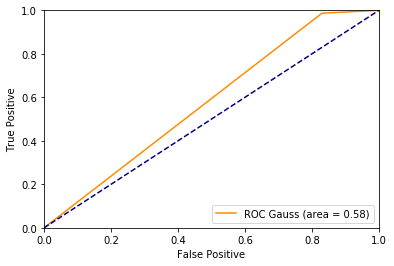

In [19]:
plt.figure()
plt.plot(false_pos, true_pos, color='darkorange',label='ROC Gauss (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="lower right")
plt.show()

In [20]:
#SGD 5
import sklearn.metrics as metrics

scoreSGD_5 = sgd.fit(X_train, y_train_5)
pred_SGD_Test = scoreSGD_5.predict(X_test)
print(pred_SGD_Test)
#print(y_test[[48400]])
#print(pred_SGD_Test[[48400]])


[False False  True ... False False False]


In [21]:
false_pos, true_pos, threshold = metrics.roc_curve(y_test_5, pred_SGD_Test)
roc_auc = metrics.auc(false_pos, true_pos)

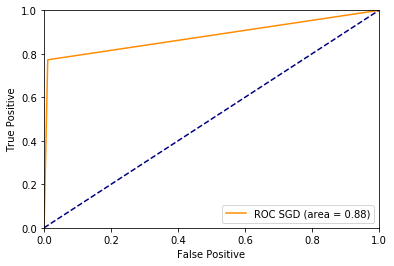

In [22]:
plt.figure()
plt.plot(false_pos, true_pos, color='darkorange',label='ROC SGD (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="lower right")
plt.show()

In [23]:
#Forrest 5
import sklearn.metrics as metrics

scoreForr_5 = forr.fit(X_train, y_train_5)
pred_Forr_Test = scoreForr_5.predict(X_test)
print(pred_Forr_Test)
#print(y_test[[48400]])
#print(pred_Forr_Test[[48400]])


[False False False ... False False False]


In [24]:
false_pos, true_pos, threshold = metrics.roc_curve(y_test_5, pred_Forr_Test)
roc_auc = metrics.auc(false_pos, true_pos)

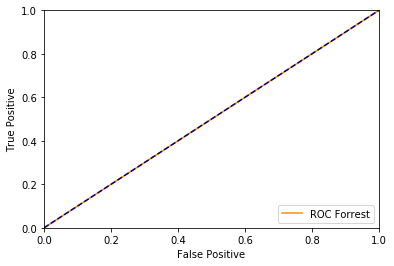

In [25]:
plt.figure()
plt.plot(false_pos, true_pos, color='darkorange',label='ROC Forrest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="lower right")
plt.show()